### Technical challenge (05-Sep-2020)

Data available at [Open Data BCN](https://opendata-ajuntament.barcelona.cat/data/en/dataset/transit-relacio-trams)

In [206]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
sns.set_style("darkgrid")
sns.despine()
sns.set_context(rc={'axes.labelsize':18,
                    'axes.titlesize':18,
                    'font.size':15,
                    'legend.fontsize':15,
                    'lines.linewidth':2.2})

<Figure size 432x288 with 0 Axes>

### Field information:

* idTram: Tram identification number (more infomrmation in [Relació de trams de la via pública de la ciutat de Barcelona](https://opendata-ajuntament.barcelona.cat/data/en/dataset/transit-relacio-trams))

* data: Date of registration (format: YYYY-MM-DD)

* estatActual: Current traffic status
(0 = sense dades / 1 = molt fluid / 2 = fluid / 3 = dens / 4 = molt dens / 5 = congestió / 6 = tallat) 

* estatPrevist: Expected traffic status after 15min
(0 = sense dades / 1 = molt fluid / 2 = fluid / 3 = dens / 4 = molt dens / 5 = congestió / 6 = tallat) 

In [3]:
# There are 8 csv files from this year.
# Load one of the files (2020-Jan) to check the contents.

tram_01 = pd.read_csv('./data/2020_01_Gener_TRAMS_TRAMS.csv')
print(tram_01.shape)
tram_01.head()

(4639708, 4)


idTram            data  estatActual  estatPrevist
0       1  20200101000051            0             0
1       2  20200101000051            0             0
2       3  20200101000051            0             0
3       4  20200101000051            0             0
4       5  20200101000051            0             0

In [4]:
# Print data types
# Why: to check 'data' colmn is accessible by datetime module

tram_01.dtypes

idTram          int64
data            int64
estatActual     int64
estatPrevist    int64
dtype: object

In [5]:
# Check if there are corrupted data:
# 1. empty rows
# 2. duplicated data

print(f'Proportion of empty rows?: {tram_01.isnull().any().mean()}')
print(f'Proportion of duplicated rows?: {tram_01.duplicated().mean()}')

Proportion of empty rows?: 0.0
Proportion of duplicated rows?: 0.0


### Note:
* All fields contain numeric values
* 'data' column should be converted to datetime type
* No missing values, no duplicated records

### What we can do?
1. Track each tram's traffic status by time (-> can be visualized by timeseries graphs) -> Is there a pattern?
2. Check their trajectory using another data('Street sections relations of the public road of the city of Barcelona') to guess the reason of pattern displayed by the first data

# Now, let's import the data of traffic state of BCN Trams this year (Jan-Aug)

In [5]:
# First, check all csv files of this directory
file_list = [file for file in glob.glob("./data/*.csv")]

# Sort the list by ascending order
file_list = np.sort(file_list)

In [7]:
# Each file is big -> don't concatenate
# Use list comprehension to crete a list of multiple dataframes
tram2020 = [pd.read_csv(file) for file in file_list]

# Print shape of each dataframe
for n in range(0,len(tram2020)):
    print(f'Shape of {n+1}th dataframe: {tram2020[n].shape}')

Shape of 1th dataframe: (4639708, 4)
Shape of 2th dataframe: (4358817, 4)
Shape of 3th dataframe: (4676071, 4)
Shape of 4th dataframe: (4545902, 4)
Shape of 5th dataframe: (4501107, 4)
Shape of 6th dataframe: (4526403, 4)
Shape of 7th dataframe: (4524295, 4)
Shape of 8th dataframe: (4691354, 4)


In [8]:
# How many trams per month? (count unique tram IDs)
for n in range(0,len(tram2020)):
    print(f'{len(tram2020[n].idTram.unique())} trams in the month of {n+1}')

527 trams in the month of 1
527 trams in the month of 2
527 trams in the month of 3
527 trams in the month of 4
527 trams in the month of 5
527 trams in the month of 6
527 trams in the month of 7
527 trams in the month of 8


In [9]:
# Modify the data:
# 1. Change column names to english
# 2. Change 'date' column into datetime type

new_names = {"data": "date", "estatActual": "CurrentState", "estatPrevist": "ExpectedState"}

for n in range(0,len(tram2020)):
    # 1. Rename columns
    tram2020[n] = tram2020[n].rename(columns=new_names)
    
    # 2. 'date' column as a datetime type
    tram2020[n]['date'] = pd.to_datetime(tram2020[n]['date'].astype(str), yearfirst=True)

In [11]:
# Print the head of the first df to check how the modification went

print(tram2020[0]['date'].dtypes)
tram2020[0].head()

datetime64[ns]


idTram                date  CurrentState  ExpectedState
0       1 2020-01-01 00:00:51             0              0
1       2 2020-01-01 00:00:51             0              0
2       3 2020-01-01 00:00:51             0              0
3       4 2020-01-01 00:00:51             0              0
4       5 2020-01-01 00:00:51             0              0

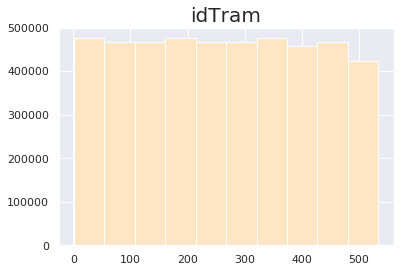

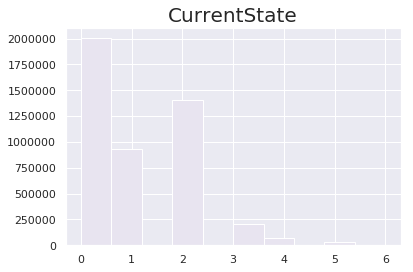

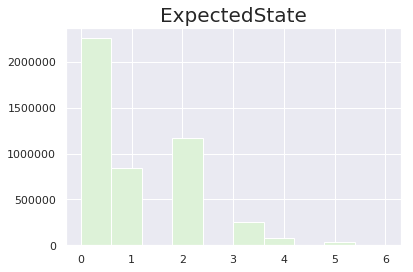

In [82]:
tram2020[0].hist('idTram', color=sns.set_palette('OrRd'))
tram2020[0].hist('CurrentState', color=sns.set_palette('PuBu'))
tram2020[0].hist('ExpectedState', color=sns.set_palette('GnBu'))
plt.show()

In [263]:
# Current state counts
current_state = pd.DataFrame()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
for n in range(0,len(tram2020)):
    current_state[months[n]] = tram2020[n].groupby('idTram')['CurrentState'].value_counts()

print(current_state.shape)
current_state.head(10)

(2405, 8)


Jan     Feb     Mar     Apr     May     Jun     Jul  \
idTram CurrentState                                                         
1      2             3982  3686.0  1637.0     NaN     NaN  3572.0  3912.0   
       0             2243  1768.0  5605.0  8626.0  8541.0  2958.0  2607.0   
       1             1635  1583.0  1020.0     NaN     NaN  1841.0  1747.0   
       3              519   663.0   333.0     NaN     NaN   205.0   298.0   
       4              398   528.0   230.0     NaN     NaN     5.0    18.0   
       5               27    43.0    21.0     NaN     NaN     8.0     3.0   
2      2             3545  3508.0  1646.0     NaN     NaN  2446.0  3045.0   
       1             3018  2871.0  1488.0     NaN     NaN  3344.0  3074.0   
       0             1847  1328.0  5482.0  8626.0  8541.0  2728.0  2366.0   
       3              394   558.0   246.0     NaN     NaN    70.0   100.0   

                        Aug  
idTram CurrentState          
1      2             3818.0  
       0             2458.0  
       1             2560.0  
       3               66.0  
       4                NaN  
       5                NaN  
2      2             1251.0  
       1             5470.0  
       0             2159.0  
       3               22.0

In [274]:
# Reset index
current_state.reset_index(inplace=True)
current_state.head(10)

idTram  CurrentState   Jan     Feb     Mar     Apr     May     Jun     Jul  \
0       1             2  3982  3686.0  1637.0     NaN     NaN  3572.0  3912.0   
1       1             0  2243  1768.0  5605.0  8626.0  8541.0  2958.0  2607.0   
2       1             1  1635  1583.0  1020.0     NaN     NaN  1841.0  1747.0   
3       1             3   519   663.0   333.0     NaN     NaN   205.0   298.0   
4       1             4   398   528.0   230.0     NaN     NaN     5.0    18.0   
5       1             5    27    43.0    21.0     NaN     NaN     8.0     3.0   
6       2             2  3545  3508.0  1646.0     NaN     NaN  2446.0  3045.0   
7       2             1  3018  2871.0  1488.0     NaN     NaN  3344.0  3074.0   
8       2             0  1847  1328.0  5482.0  8626.0  8541.0  2728.0  2366.0   
9       2             3   394   558.0   246.0     NaN     NaN    70.0   100.0   

      Aug  
0  3818.0  
1  2458.0  
2  2560.0  
3    66.0  
4     NaN  
5     NaN  
6  1251.0  
7  5470.0  
8  2159.0  
9    22.0

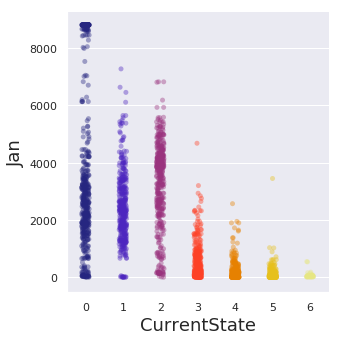

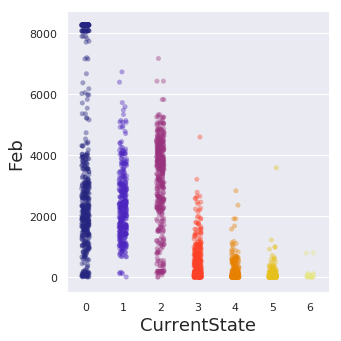

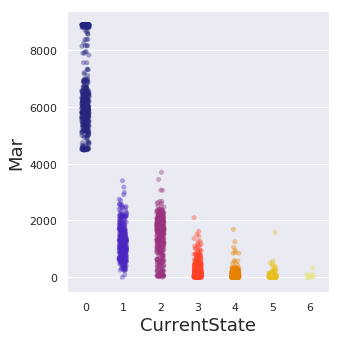

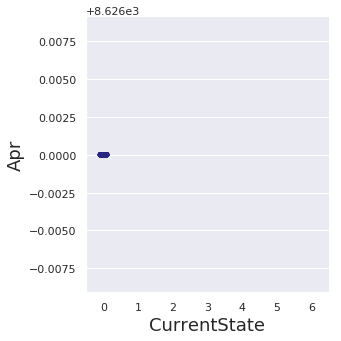

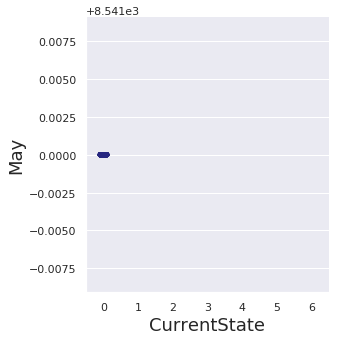

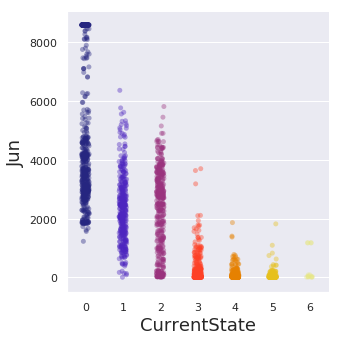

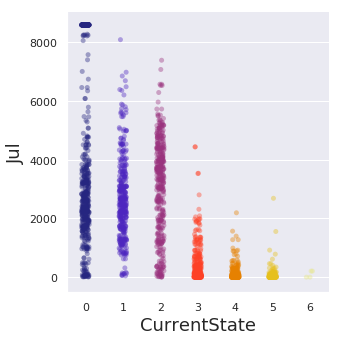

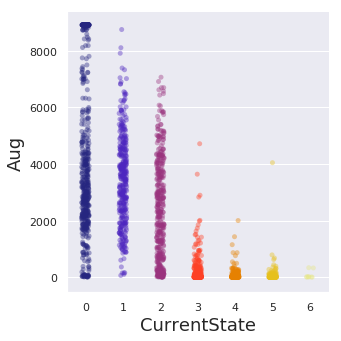

In [276]:
for i, col in enumerate(months):
    sns.catplot(x='CurrentState',
                y=col,
                data=current_state,
                palette='CMRmap', 
                alpha=.4, 
                sharey=True,
                height=5)

In [31]:
# Expected state counts
expected_state = pd.DataFrame()

for n in range(0,len(tram2020)):
    expected_state[n+1] = tram2020[n].groupby('idTram')['ExpectedState'].value_counts()

print(expected_state.shape)
expected_state.head()

(2444, 8)


1       2       3       4       5       6       7  \
idTram ExpectedState                                                         
1      2              3520  3438.0  1950.0   350.0  1426.0  3527.0  3651.0   
       0              2870  1916.0  3843.0  5241.0  4218.0  2481.0  2820.0   
       1              1473  1576.0  2308.0  2930.0  2629.0  2156.0  1619.0   
       3               603   790.0   473.0   103.0   254.0   396.0   468.0   
       4               280   448.0   239.0     2.0    14.0    20.0    24.0   

                           8  
idTram ExpectedState          
1      2              3697.0  
       0              2692.0  
       1              2320.0  
       3               192.0  
       4                 1.0

In [265]:
# Expected state counts
expected_state = pd.DataFrame()
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug']
for n in range(0,len(tram2020)):
    expected_state[months[n]] = tram2020[n].groupby('idTram')['ExpectedState'].value_counts()

print(expected_state.shape)
expected_state.head(10)

(2444, 8)


Jan     Feb     Mar     Apr     May     Jun     Jul  \
idTram ExpectedState                                                         
1      2              3520  3438.0  1950.0   350.0  1426.0  3527.0  3651.0   
       0              2870  1916.0  3843.0  5241.0  4218.0  2481.0  2820.0   
       1              1473  1576.0  2308.0  2930.0  2629.0  2156.0  1619.0   
       3               603   790.0   473.0   103.0   254.0   396.0   468.0   
       4               280   448.0   239.0     2.0    14.0    20.0    24.0   
       5                58   103.0    33.0     NaN     NaN     9.0     3.0   
2      2              3318  3402.0  1863.0   224.0   503.0  2187.0  3053.0   
       1              2829  2712.0  3007.0  3168.0  3566.0  3786.0  2811.0   
       0              2118  1548.0  3678.0  5121.0  4336.0  2280.0  2559.0   
       3               492   535.0   274.0    84.0   100.0   314.0   160.0   

                         Aug  
idTram ExpectedState          
1      2              3697.0  
       0              2692.0  
       1              2320.0  
       3               192.0  
       4                 1.0  
       5                 NaN  
2      2              1436.0  
       1              4775.0  
       0              2532.0  
       3               157.0

In [266]:
# Reset index
expected_state.reset_index(inplace=True)
expected_state.head(10)

idTram  ExpectedState   Jan     Feb     Mar     Apr     May     Jun  \
0       1              2  3520  3438.0  1950.0   350.0  1426.0  3527.0   
1       1              0  2870  1916.0  3843.0  5241.0  4218.0  2481.0   
2       1              1  1473  1576.0  2308.0  2930.0  2629.0  2156.0   
3       1              3   603   790.0   473.0   103.0   254.0   396.0   
4       1              4   280   448.0   239.0     2.0    14.0    20.0   
5       1              5    58   103.0    33.0     NaN     NaN     9.0   
6       2              2  3318  3402.0  1863.0   224.0   503.0  2187.0   
7       2              1  2829  2712.0  3007.0  3168.0  3566.0  3786.0   
8       2              0  2118  1548.0  3678.0  5121.0  4336.0  2280.0   
9       2              3   492   535.0   274.0    84.0   100.0   314.0   

      Jul     Aug  
0  3651.0  3697.0  
1  2820.0  2692.0  
2  1619.0  2320.0  
3   468.0   192.0  
4    24.0     1.0  
5     3.0     NaN  
6  3053.0  1436.0  
7  2811.0  4775.0  
8  2559.0  2532.0  
9   160.0   157.0

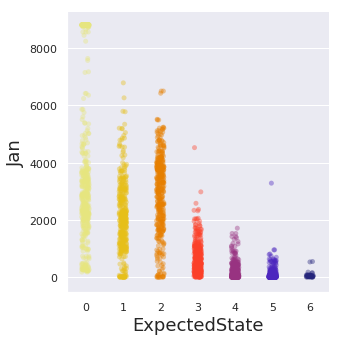

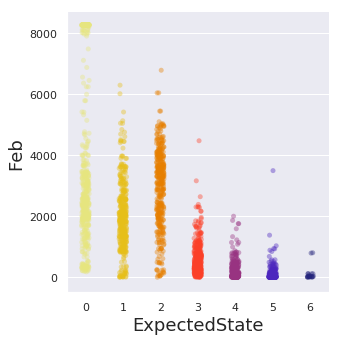

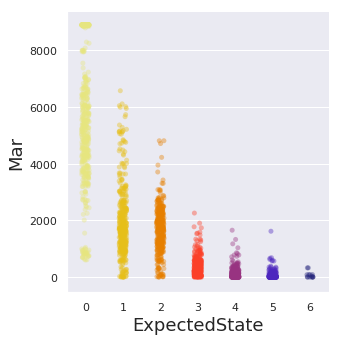

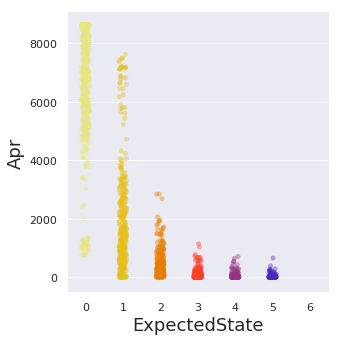

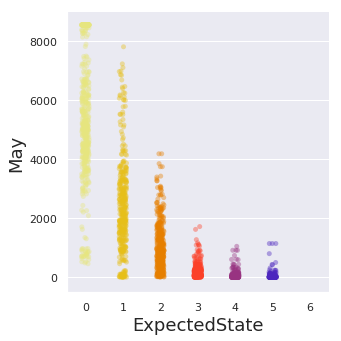

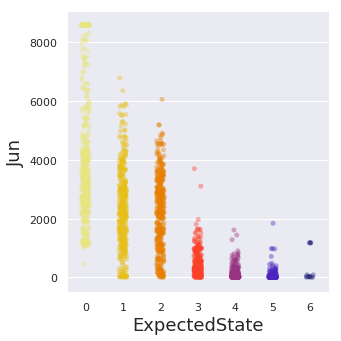

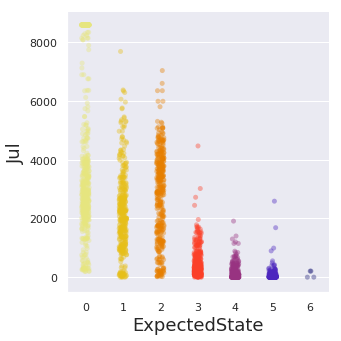

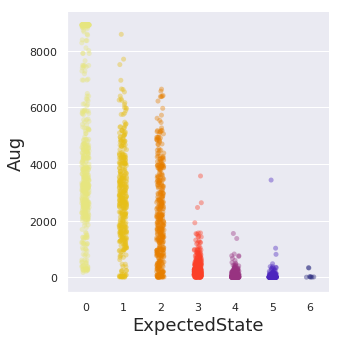

In [277]:
for i, col in enumerate(months):
    sns.catplot(x='ExpectedState',
                y=col,
                data=expected_state,
                palette='CMRmap_r', 
                alpha=.4, 
                sharey=True,
                height=5)